In [1]:
# goal: create two circuits which do not have any entanglement and thus 
# can be separated and run separately. Then get the cartesian product to 
# recreate the original distribution

In [2]:
import pandas as pd
import sys
sys.path.append("../lib")
import seaborn as sns
import matplotlib.pyplot as plt
from utils import iterate_over
from utils import load_config_and_check
from inspector import Inspector
from tqdm import tqdm
import sqlite3 as sl
import os

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
config = load_config_and_check("../config/qmt_v04.yaml")

In [4]:
from metamorph import *
from qmt import get_mr_function_and_kwargs
from metamorph_test import show_tree

In [13]:
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr_main = QuantumRegister(9, name='qr_qr')
cr_main = ClassicalRegister(9, name='cr_qr')
qc_main = QuantumCircuit(qr_main, cr_main, name='qc_main')


qr_1 = QuantumRegister(6, name='qr_qr')
cr_1 = ClassicalRegister(6, name='cr_qr')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(SXdgGate(), qargs=[qr_1[5]], cargs=[])
qc_1.append(ECRGate(), qargs=[qr_1[2], qr_1[3]], cargs=[])


qr_2 = QuantumRegister(3, name='qr_qr')
cr_2 = ClassicalRegister(3, name='cr_qr')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')
qc_2.append(SXdgGate(), qargs=[qr_2[2]], cargs=[])
qc_2.append(ECRGate(), qargs=[qr_2[1], qr_2[0]], cargs=[])

qc_main.append(qc_1, qargs=qr_main[:6], cargs=cr_main[:6])
qc_main.append(qc_2, qargs=qr_main[6:], cargs=cr_main[6:])

qc_main.measure_all()
qc_main.draw(fold=-1)




┌───────┐          ░ ┌─┐                        
qr_qr_0: ┤0      ├──────────░─┤M├────────────────────────
         │       │          ░ └╥┘┌─┐                     
qr_qr_1: ┤1      ├──────────░──╫─┤M├─────────────────────
         │       │          ░  ║ └╥┘┌─┐                  
qr_qr_2: ┤2      ├──────────░──╫──╫─┤M├──────────────────
         │       │          ░  ║  ║ └╥┘┌─┐               
qr_qr_3: ┤3      ├──────────░──╫──╫──╫─┤M├───────────────
         │       │          ░  ║  ║  ║ └╥┘┌─┐            
qr_qr_4: ┤4      ├──────────░──╫──╫──╫──╫─┤M├────────────
         │       │          ░  ║  ║  ║  ║ └╥┘┌─┐         
qr_qr_5: ┤5      ├──────────░──╫──╫──╫──╫──╫─┤M├─────────
         │       │┌───────┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐      
qr_qr_6: ┤       ├┤0      ├─░──╫──╫──╫──╫──╫──╫─┤M├──────
         │       ││       │ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
qr_qr_7: ┤  qc_1 ├┤1      ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├───
         │       ││       │ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
qr_qr_8: ┤       ├┤2      ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         │       ││       │ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
cr_qr_0: ╡0      ╞╡       ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
         │       ││       │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_1: ╡1      ╞╡       ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
         │       ││       │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_2: ╡2      ╞╡       ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
         │       ││  qc_2 │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_3: ╡3      ╞╡       ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
         │       ││       │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_4: ╡4      ╞╡       ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
         │       ││       │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_5: ╡5      ╞╡       ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
         └───────┘│       │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_6: ═════════╡0      ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
                  │       │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_7: ═════════╡1      ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
                  │       │    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
cr_qr_8: ═════════╡2      ╞════╬══╬══╬══╬══╬══╬══╬══╬══╬═
                  └───────┘    ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 meas_0: ══════════════════════╩══╬══╬══╬══╬══╬══╬══╬══╬═
                                  ║  ║  ║  ║  ║  ║  ║  ║ 
 meas_1: ═════════════════════════╩══╬══╬══╬══╬══╬══╬══╬═
                                     ║  ║  ║  ║  ║  ║  ║ 
 meas_2: ════════════════════════════╩══╬══╬══╬══╬══╬══╬═
                                        ║  ║  ║  ║  ║  ║ 
 meas_3: ═══════════════════════════════╩══╬══╬══╬══╬══╬═
                                           ║  ║  ║  ║  ║ 
 meas_4: ══════════════════════════════════╩══╬══╬══╬══╬═
                                              ║  ║  ║  ║ 
 meas_5: ═════════════════════════════════════╩══╬══╬══╬═
                                                 ║  ║  ║ 
 meas_6: ════════════════════════════════════════╩══╬══╬═
                                                    ║  ║ 
 meas_7: ═══════════════════════════════════════════╩══╬═
                                                       ║ 
 meas_8: ══════════════════════════════════════════════╩═

In [16]:
qc_main_decomposed = qc_main.decompose()
qc_main_decomposed = qc_main_decomposed.decompose()
qc_main_decomposed = qc_main_decomposed.decompose()
qc_main_decomposed.draw(fold=-1)

global phase: 3π/2
                                                                                             ░ ┌─┐                        
qr_qr_0: ────────────────────────────────────────────────────────────────────────────────────░─┤M├────────────────────────
                                                                                             ░ └╥┘┌─┐                     
qr_qr_1: ────────────────────────────────────────────────────────────────────────────────────░──╫─┤M├─────────────────────
                                               ┌───────────┐                                 ░  ║ └╥┘┌─┐                  
qr_qr_2: ────────────────■──────────────────■──┤ U3(π,0,π) ├───────■────────────────■────────░──╫──╫─┤M├──────────────────
            ┌───┐      ┌─┴─┐   ┌─────────┐┌─┴─┐└───┬───┬───┘┌───┐┌─┴─┐┌──────────┐┌─┴─┐┌───┐ ░  ║  ║ └╥┘┌─┐               
qr_qr_3: ───┤ H ├──────┤ X ├───┤ Rz(π/4) ├┤ X ├────┤ H ├────┤ H ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ H ├─░──╫──╫──╫─┤M├───────────────
            └───┘      └───┘   └─────────┘└───┘    └───┘    └───┘└───┘└──────────┘└───┘└───┘ ░  ║  ║  ║ └╥┘┌─┐            
qr_qr_4: ────────────────────────────────────────────────────────────────────────────────────░──╫──╫──╫──╫─┤M├────────────
         ┌─────────┐┌─────────┐┌─────────┐                                                   ░  ║  ║  ║  ║ └╥┘┌─┐         
qr_qr_5: ┤ U1(π/2) ├┤ U2(0,π) ├┤ U1(π/2) ├───────────────────────────────────────────────────░──╫──╫──╫──╫──╫─┤M├─────────
         └──┬───┬──┘└──┬───┬──┘├─────────┤┌───┐    ┌───┐    ┌───┐┌───┐┌──────────┐┌───┐┌───┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐      
qr_qr_6: ───┤ H ├──────┤ X ├───┤ Rz(π/4) ├┤ X ├────┤ H ├────┤ H ├┤ X ├┤ Rz(-π/4) ├┤ X ├┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├──────
            └───┘      └─┬─┘   └─────────┘└─┬─┘┌───┴───┴───┐└───┘└─┬─┘└──────────┘└─┬─┘└───┘ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
qr_qr_7: ────────────────■──────────────────■──┤ U3(π,0,π) ├───────■────────────────■────────░──╫──╫──╫──╫──╫──╫──╫─┤M├───
         ┌─────────┐┌─────────┐┌─────────┐     └───────────┘                                 ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
qr_qr_8: ┤ U1(π/2) ├┤ U2(0,π) ├┤ U1(π/2) ├───────────────────────────────────────────────────░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         └─────────┘└─────────┘└─────────┘                                                   ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
cr_qr: 9/═══════════════════════════════════════════════════════════════════════════════════════╬══╬══╬══╬══╬══╬══╬══╬══╬═
                                                                                                ║  ║  ║  ║  ║  ║  ║  ║  ║ 
 meas: 9/═══════════════════════════════════════════════════════════════════════════════════════╩══╩══╩══╩══╩══╩══╩══╩══╩═
                                                                                                0  1  2  3  4  5  6  7  8

## Test Generator

In [17]:
from generation_strategy_python import QiskitSeparableFuzzer

In [41]:
config_generator = config["generation_strategy"]
generator =  QiskitSeparableFuzzer()

py_file, metadata = generator.generate_file(
    gate_set=config_generator["gate_set"],
    n_qubits=10,
    n_ops=5,
    optimizations=[],
    backend="qasm_simulator",
    shots=1024,
    level_auto_optimization=3,
    target_gates=None
)

In [42]:
print(py_file)


# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr_main = QuantumRegister(10, name='qr_main')
cr_main = ClassicalRegister(10, name='cr_main')
qc_main = QuantumCircuit(qr_main, cr_main, name='qc_main')

qr_1 = QuantumRegister(2, name='qr_1')
cr_1 = ClassicalRegister(2, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(SdgGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(XGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(RZZGate(0.4429181854627117), qargs=[qr_1[1], qr_1[0]], cargs=[])
qc_1.append(RYYGate(2.2725577430206263), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(TGate(), qargs=[qr_1[0]], cargs=[])

qr_2 = QuantumRegister(8, name='qr_2')
cr_2 = ClassicalRegister(8, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')
qc_2.append(CSXGate(), qargs=[qr_2[0], qr_2[4]], cargs=[])
qc_2.append(HGate(), qargs=[qr_2[1]], c

## Manual Run

In [43]:
qr_main = QuantumRegister(10, name='qr_main')
cr_main = ClassicalRegister(10, name='cr_main')
qc_main = QuantumCircuit(qr_main, cr_main, name='qc_main')

qr_1 = QuantumRegister(2, name='qr_1')
cr_1 = ClassicalRegister(2, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(SdgGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(XGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(RZZGate(0.4429181854627117), qargs=[qr_1[1], qr_1[0]], cargs=[])
qc_1.append(RYYGate(2.2725577430206263), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(TGate(), qargs=[qr_1[0]], cargs=[])

qr_2 = QuantumRegister(8, name='qr_2')
cr_2 = ClassicalRegister(8, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')
qc_2.append(CSXGate(), qargs=[qr_2[0], qr_2[4]], cargs=[])
qc_2.append(HGate(), qargs=[qr_2[1]], cargs=[])
qc_2.append(CSXGate(), qargs=[qr_2[6], qr_2[1]], cargs=[])
qc_2.append(CRXGate(4.017627836736385), qargs=[qr_2[4], qr_2[2]], cargs=[])
qc_2.append(RZGate(5.914588166120627), qargs=[qr_2[6]], cargs=[])

qc_main.append(qc_1, qargs=qr_main[:2], cargs=cr_main[:2])
qc_main.append(qc_2, qargs=qr_main[2:], cargs=cr_main[2:])
qc_main.draw(fold=-1)

┌───────┐         
qr_main_0: ┤0      ├─────────
           │       │         
qr_main_1: ┤1      ├─────────
           │       │┌───────┐
qr_main_2: ┤       ├┤0      ├
           │       ││       │
qr_main_3: ┤       ├┤1      ├
           │       ││       │
qr_main_4: ┤       ├┤2      ├
           │       ││       │
qr_main_5: ┤       ├┤3      ├
           │  qc_1 ││       │
qr_main_6: ┤       ├┤4      ├
           │       ││       │
qr_main_7: ┤       ├┤5      ├
           │       ││       │
qr_main_8: ┤       ├┤6      ├
           │       ││       │
qr_main_9: ┤       ├┤7      ├
           │       ││       │
cr_main_0: ╡0      ╞╡       ╞
           │       ││  qc_2 │
cr_main_1: ╡1      ╞╡       ╞
           └───────┘│       │
cr_main_2: ═════════╡0      ╞
                    │       │
cr_main_3: ═════════╡1      ╞
                    │       │
cr_main_4: ═════════╡2      ╞
                    │       │
cr_main_5: ═════════╡3      ╞
                    │       │
cr_main_6: ═════════╡4      ╞
                    │       │
cr_main_7: ═════════╡5      ╞
                    │       │
cr_main_8: ═════════╡6      ╞
                    │       │
cr_main_9: ═════════╡7      ╞
                    └───────┘

In [44]:
from qiskit import transpile
qc_main = transpile(qc_main, basis_gates=None, optimization_level=3, coupling_map=None)
qc_main.measure(qr_main, cr_main)
from qiskit import Aer, transpile, execute
backend_1aadb08f9aac4c348050ae3bf9e30b12 = Aer.get_backend('qasm_simulator')
counts_main = execute(qc_main, backend=backend_1aadb08f9aac4c348050ae3bf9e30b12, shots=1024).result().get_counts(qc_main)

In [45]:
counts_main

{'0000000001': 80, '0000000010': 411, '0000001001': 91, '0000001010': 442}

In [46]:
from qiskit import transpile
qc_1 = transpile(qc_1, basis_gates=None, optimization_level=3, coupling_map=None)
qc_1.measure(qr_1, cr_1)
from qiskit import Aer, transpile, execute
backend_1aadb08f9aac4c348050ae3bf9e30b12 = Aer.get_backend('qasm_simulator')

counts_1 = execute(qc_1, backend=backend_1aadb08f9aac4c348050ae3bf9e30b12, shots=1024).result().get_counts(qc_1)

In [47]:
counts_1

{'01': 169, '10': 855}

In [48]:
from qiskit import transpile
qc_2 = transpile(qc_2, basis_gates=None, optimization_level=3, coupling_map=None)
qc_2.measure(qr_2, cr_2)
from qiskit import Aer, transpile, execute
backend_1aadb08f9aac4c348050ae3bf9e30b12 = Aer.get_backend('qasm_simulator')

counts_2 = execute(qc_2, backend=backend_1aadb08f9aac4c348050ae3bf9e30b12, shots=1024).result().get_counts(qc_2)

In [49]:
counts_2

{'00000010': 517, '00000000': 507}

In [57]:
from typing import Dict, List, Any
from functools import reduce

def reconstruct(counts: List[Dict[str, int]]):
    """Pass the count results.
    
    NB: list the circuit working on lower qubit indices first.
    """
    return reduce(lambda counts_1, counts_2: {
        k2 + k1: v1 * v2 for k1, v1 in counts_1.items() for k2, v2 in counts_2.items()
    }, counts)
    
    

In [50]:
count_reconstructed = {
    k2 + k1: v1 * v2 for k1, v1 in counts_1.items() for k2, v2 in counts_2.items()
}
count_reconstructed

{'0000001001': 87373,
 '0000000001': 85683,
 '0000001010': 442035,
 '0000000010': 433485}

In [58]:
reconstruct([counts_1, counts_2])

{'0000001001': 87373,
 '0000000001': 85683,
 '0000001010': 442035,
 '0000000010': 433485}

## Extract circuits via Static Analysis

In [52]:
from metamorph import get_circuits_used

In [54]:
get_circuits_used("""
qr_main = QuantumRegister(10, name='qr_main')
cr_main = ClassicalRegister(10, name='cr_main')
qc_main = QuantumCircuit(qr_main, cr_main, name='qc_main')

qr_1 = QuantumRegister(2, name='qr_1')
cr_1 = ClassicalRegister(2, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(SdgGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(XGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(RZZGate(0.4429181854627117), qargs=[qr_1[1], qr_1[0]], cargs=[])
qc_1.append(RYYGate(2.2725577430206263), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(TGate(), qargs=[qr_1[0]], cargs=[])

qr_2 = QuantumRegister(8, name='qr_2')
cr_2 = ClassicalRegister(8, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')
qc_2.append(CSXGate(), qargs=[qr_2[0], qr_2[4]], cargs=[])
qc_2.append(HGate(), qargs=[qr_2[1]], cargs=[])
qc_2.append(CSXGate(), qargs=[qr_2[6], qr_2[1]], cargs=[])
qc_2.append(CRXGate(4.017627836736385), qargs=[qr_2[4], qr_2[2]], cargs=[])
qc_2.append(RZGate(5.914588166120627), qargs=[qr_2[6]], cargs=[])

qc_main.append(qc_1, qargs=qr_main[:2], cargs=cr_main[:2])
qc_main.append(qc_2, qargs=qr_main[2:], cargs=cr_main[2:])
qc_main.draw(fold=-1)
""")

[{'name': 'qc_main',
  'quantum_register': 'qr_main',
  'classical_register': 'cr_main',
  'size': 10},
 {'name': 'qc_1',
  'quantum_register': 'qr_1',
  'classical_register': 'cr_1',
  'size': 2},
 {'name': 'qc_2',
  'quantum_register': 'qr_2',
  'classical_register': 'cr_2',
  'size': 8}]

## Test the metamorphic relationship

In [9]:
config_4 = load_config_and_check("../config/qmt_v04.yaml")

np.random.seed(36)
random.seed(36)

morph, kwargs = get_mr_function_and_kwargs(config_4, metamorphic_strategy="run_partitions_and_aggregate")
out_code = morph("""
# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr_main = QuantumRegister(10, name='qr_main')
cr_main = ClassicalRegister(10, name='cr_main')
qc_main = QuantumCircuit(qr_main, cr_main, name='qc_main')

qr_1 = QuantumRegister(2, name='qr_1')
cr_1 = ClassicalRegister(2, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(SdgGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(XGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(RZZGate(0.4429181854627117), qargs=[qr_1[1], qr_1[0]], cargs=[])
qc_1.append(RYYGate(2.2725577430206263), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(TGate(), qargs=[qr_1[0]], cargs=[])

qr_2 = QuantumRegister(8, name='qr_2')
cr_2 = ClassicalRegister(8, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')
qc_2.append(CSXGate(), qargs=[qr_2[0], qr_2[4]], cargs=[])
qc_2.append(HGate(), qargs=[qr_2[1]], cargs=[])
qc_2.append(CSXGate(), qargs=[qr_2[6], qr_2[1]], cargs=[])
qc_2.append(CRXGate(4.017627836736385), qargs=[qr_2[4], qr_2[2]], cargs=[])
qc_2.append(RZGate(5.914588166120627), qargs=[qr_2[6]], cargs=[])

qc_main.append(qc_1, qargs=qr_main[:2], cargs=cr_main[:2])
qc_main.append(qc_2, qargs=qr_main[2:], cargs=cr_main[2:])

# SECTION
# NAME: OPTIMIZATION_PASSES

from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import *
passmanager = PassManager()
qc_main = passmanager.run(qc_main)

# SECTION
# NAME: OPTIMIZATION_LEVEL

from qiskit import transpile
qc_main = transpile(qc_main, basis_gates=None, optimization_level=3, coupling_map=None)

# SECTION
# NAME: MEASUREMENT

qc_main.measure(qr_main, cr_main)

# SECTION
# NAME: EXECUTION

from qiskit import Aer, transpile, execute
backend_bfe499e55f2a46d9af796663b94b4970 = Aer.get_backend('qasm_simulator')
counts = execute(qc_main, backend=backend_bfe499e55f2a46d9af796663b94b4970, shots=1024).result().get_counts(qc_main)
RESULT = counts

""", **kwargs)[0]
print(out_code)

# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *
# SECTION
# NAME: CIRCUIT

qr_main = QuantumRegister(10, name='qr_main')
cr_main = ClassicalRegister(10, name='cr_main')
qc_main = QuantumCircuit(qr_main, cr_main, name='qc_main')
qr_1 = QuantumRegister(2, name='qr_1')
cr_1 = ClassicalRegister(2, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(SdgGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(XGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(RZZGate(0.4429181854627117), qargs=[qr_1[1], qr_1[0]], cargs=[])
qc_1.append(RYYGate(2.2725577430206263), qargs=[qr_1[0], qr_1[1]], cargs=[])
qc_1.append(TGate(), qargs=[qr_1[0]], cargs=[])
qr_2 = QuantumRegister(8, name='qr_2')
cr_2 = ClassicalRegister(8, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')
qc_2.append(CSXGate(), qargs=[qr_2[0], qr_2[4]], cargs=[])
qc_2.append(HGate(), qargs=[qr_2[1]], cargs

In [10]:
GLOBALS = {"RESULT": 0}
exec(out_code, GLOBALS)
GLOBALS["RESULT"]

{'0000000010': 473670,
 '0000001010': 377274,
 '0000000001': 110010,
 '0000001001': 87622}

In [ ]:
{'0000001001': 87373,
 '0000000001': 85683,
 '0000001010': 442035,
 '0000000010': 433485}

# INSPECT POSSIBLE DIVERGENCES

In [8]:
from qmt import execute_single_py_program

PROGRAM_ID = "2b684bc692404d98a637751bf9cbef7e"


PATH_SOURCE = os.path.join(config["experiment_folder"], "programs", "source", f"{PROGRAM_ID}.py")
print(open(PATH_SOURCE, 'r').read())
counts_source = execute_single_py_program(PATH_SOURCE)
print("-" * 80)
PATH_FOLLOWUP = os.path.join(config["experiment_folder"], "programs", "followup", f"{PROGRAM_ID}.py")
print(open(PATH_FOLLOWUP, 'r').read())
counts_follow = execute_single_py_program(PATH_FOLLOWUP)


# SECTION
# NAME: PROLOGUE

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library.standard_gates import *

# SECTION
# NAME: CIRCUIT

qr_main = QuantumRegister(8, name='qr_main')
cr_main = ClassicalRegister(8, name='cr_main')
qc_main = QuantumCircuit(qr_main, cr_main, name='qc_main')

qr_1 = QuantumRegister(1, name='qr_1')
cr_1 = ClassicalRegister(1, name='cr_1')
qc_1 = QuantumCircuit(qr_1, cr_1, name='qc_1')
qc_1.append(RXGate(3.514427971795593), qargs=[qr_1[0]], cargs=[])
qc_1.append(ZGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(RXGate(5.201522684257953), qargs=[qr_1[0]], cargs=[])
qc_1.append(UGate(1.8522777990670056,2.588488816542936,1.2590639615916288), qargs=[qr_1[0]], cargs=[])
qc_1.append(SdgGate(), qargs=[qr_1[0]], cargs=[])
qc_1.append(SXdgGate(), qargs=[qr_1[0]], cargs=[])

qr_2 = QuantumRegister(7, name='qr_2')
cr_2 = ClassicalRegister(7, name='cr_2')
qc_2 = QuantumCircuit(qr_2, cr_2, name='qc_2')
qc_2.append(RXGa

stat: 0.006073758983106081, pval: 0.9999441616834833
n_qubits: 8
n_shots_platform_a: 2771.0
n_shots_platform_b: 7678441.0
Uniform threshold: 0.00390625


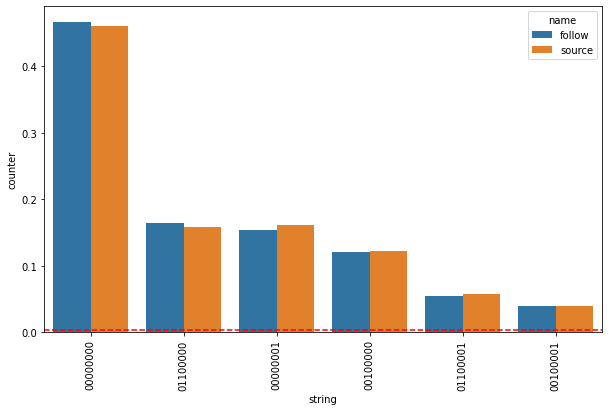

In [12]:
from inspector import OneNightStandInspector
from detectors import KS_Detector, Energy_Detector
detector = KS_Detector()
stat, pval = detector.check(counts_source, counts_follow)
print(f"stat: {stat}, pval: {pval}")
OneNightStandInspector(counts_source, counts_follow, name_a="source", name_b="follow", top_perc=1)

## RERUN

In [ ]:
# divergence.ks.p-value =  2.717850e-07
# id: 2b684bc692404d98a637751bf9cbef7e